#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# load data

In [3]:
data=pd.read_csv("E:\Datasets\diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data preprocessing

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.Insulin.value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [7]:
# Replace insuline by mean where 0
data['Insulin'].replace(to_replace=0, value=data['Insulin'].median(),inplace=True)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Data imbalancing

In [12]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [13]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=50)

#### Normalize the data within a particular range.

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(x_train)
X_test=ss.transform(x_test)

###  Build Artificial Neural Network

 #### Initialize the Artificial Neural Network

In [16]:
model=Sequential()


#### Add the input layer and the first hidden layer

In [17]:
model.add(Dense(units=6,activation='relu',input_dim=8))  #Input layers

#### Add the second hidden layer

In [18]:
model.add(Dense(units=6,activation='relu'))    # Hidden layers

#### Add the output layer

In [19]:
model.add(Dense(units=1,activation='sigmoid'))  # Output layer

### Train the ANN

#### Compile the ANN Model

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


#### Fit the ANN to the Training set

In [22]:
history=model.fit(X_train,y_train,batch_size=32,epochs=100,validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 4s 49ms/step - loss: 0.7212 - accuracy: 0.4313 - val_loss: 0.7147 - val_accuracy: 0.5188
Epoch 2/100
20/20 [==============================] - 0s 16ms/step - loss: 0.6961 - accuracy: 0.4953 - val_loss: 0.6862 - val_accuracy: 0.5250
Epoch 3/100
20/20 [==============================] - 0s 17ms/step - loss: 0.6781 - accuracy: 0.5234 - val_loss: 0.6634 - val_accuracy: 0.5750
Epoch 4/100
20/20 [==============================] - 0s 17ms/step - loss: 0.6652 - accuracy: 0.5375 - val_loss: 0.6438 - val_accuracy: 0.6125
Epoch 5/100
20/20 [==============================] - 0s 25ms/step - loss: 0.6528 - accuracy: 0.5703 - val_loss: 0.6310 - val_accuracy: 0.6438
Epoch 6/100
20/20 [==============================] - 0s 17ms/step - loss: 0.6426 - accuracy: 0.6094 - val_loss: 0.6194 - val_accuracy: 0.6687
Epoch 7/100
20/20 [==============================] - 0s 22ms/step - loss: 0.6323 - accuracy: 0.6328 - val_loss: 0.6081 - val_accuracy: 0.6687
Epoch 

20/20 [==============================] - 0s 20ms/step - loss: 0.4404 - accuracy: 0.7781 - val_loss: 0.5432 - val_accuracy: 0.7063
Epoch 59/100
20/20 [==============================] - 0s 21ms/step - loss: 0.4394 - accuracy: 0.7859 - val_loss: 0.5404 - val_accuracy: 0.7063
Epoch 60/100
20/20 [==============================] - 0s 16ms/step - loss: 0.4386 - accuracy: 0.7844 - val_loss: 0.5399 - val_accuracy: 0.7063
Epoch 61/100
20/20 [==============================] - 0s 23ms/step - loss: 0.4386 - accuracy: 0.7828 - val_loss: 0.5435 - val_accuracy: 0.7125
Epoch 62/100
20/20 [==============================] - 0s 23ms/step - loss: 0.4376 - accuracy: 0.7844 - val_loss: 0.5391 - val_accuracy: 0.7125
Epoch 63/100
20/20 [==============================] - 0s 16ms/step - loss: 0.4364 - accuracy: 0.7844 - val_loss: 0.5405 - val_accuracy: 0.7063
Epoch 64/100
20/20 [==============================] - 1s 30ms/step - loss: 0.4359 - accuracy: 0.7844 - val_loss: 0.5419 - val_accuracy: 0.7000
Epoch 65/100

In [23]:
model.layers[1].get_weights()

[array([[-0.46024317, -0.33272067,  0.09518574, -0.15987259,  0.17013432,
          0.47488472],
        [-0.16610661,  0.49410176,  0.8359415 , -0.13227367, -0.08175691,
          0.09747897],
        [ 0.7008136 , -0.22251976, -0.55278385, -0.64568734,  1.0871071 ,
         -0.10126143],
        [ 0.19033283,  0.5110952 ,  0.32675698, -0.42400673, -0.4287008 ,
          0.9616722 ],
        [-0.32175592, -0.05039536,  0.6551702 , -0.2778074 , -0.25017098,
          0.5371695 ],
        [ 0.54838055,  0.6550826 , -0.15380344, -0.26351997,  0.6833864 ,
         -0.47569886]], dtype=float32),
 array([ 0.07293697, -0.02798826, -0.08281552,  0.        ,  0.10754106,
         0.2759445 ], dtype=float32)]

#### Predict the Test Set Results

In [24]:
y_pred=model.predict(X_test)
y_pred

7/7 [==============================] - 2s 68ms/step


array([[0.032184  ],
       [0.31566644],
       [0.7795339 ],
       [0.9577703 ],
       [0.4559138 ],
       [0.14844027],
       [0.8701003 ],
       [0.15493515],
       [0.49880078],
       [0.44734395],
       [0.07729223],
       [0.07589876],
       [0.10288133],
       [0.02937631],
       [0.9306769 ],
       [0.5835937 ],
       [0.09196672],
       [0.6160128 ],
       [0.20179786],
       [0.335112  ],
       [0.3967673 ],
       [0.66849625],
       [0.42853504],
       [0.4248037 ],
       [0.34018388],
       [0.79910874],
       [0.915988  ],
       [0.67361414],
       [0.8834785 ],
       [0.02780008],
       [0.8788825 ],
       [0.59350896],
       [0.19614187],
       [0.89732945],
       [0.73833174],
       [0.27304965],
       [0.08130913],
       [0.4920517 ],
       [0.3224179 ],
       [0.47227037],
       [0.02564496],
       [0.6476505 ],
       [0.8173205 ],
       [0.74972713],
       [0.51674086],
       [0.9541156 ],
       [0.04743074],
       [0.927

In [25]:
y_pred=np.where(y_pred>0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.755

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[81 27]
 [22 70]]


0.755

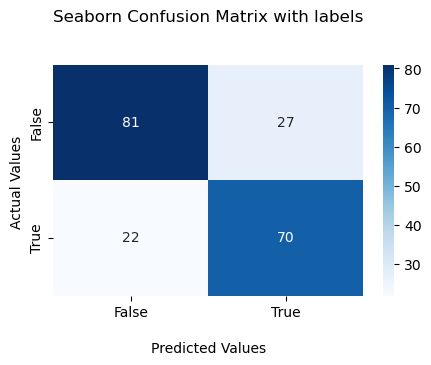

In [28]:
import seaborn as sns
plt.figure(figsize=(5,3))
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
# Loss and Validatation loss Plot

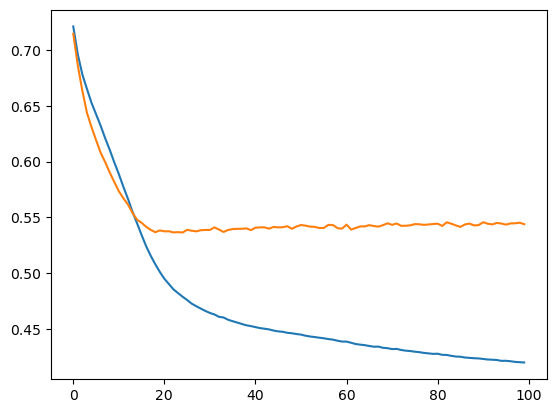

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

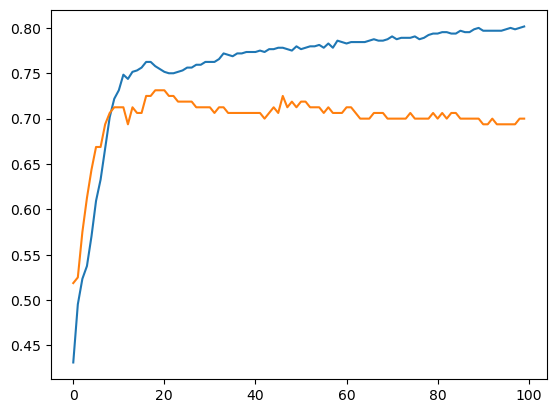

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])